In [12]:
import numpy as np 
from PIL import Image
import tifffile as tiff
import cv2
import matplotlib.pyplot as plt

# General Use Functions

In [3]:
def tiff_to_jpg(tiff_path):
    im = Image.open(tiff_path)
    out = tiff_path[:len(tiff_path)-4]+".jpg"
    im.save(out)

In [49]:
# Plot images
def plot_images(images, titles):

    for i in range(len(images)):
        plt.subplot(2, 2, i + 1)
        
        plt.subplots_adjust(hspace=0.8, wspace=0.8)
        plt.title(titles[i])
        plt.imshow(images[i])

# Project 1: Effect of Sampling

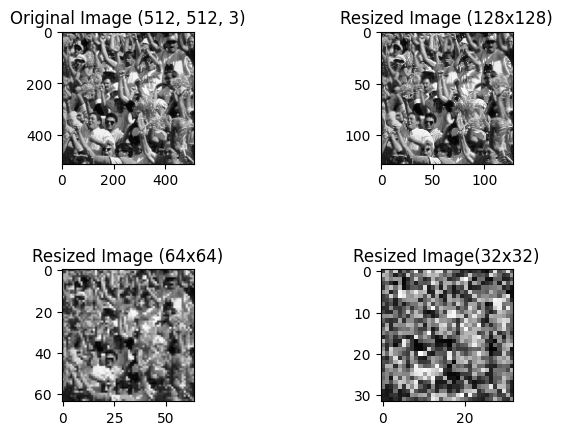

In [203]:
# Read images
high_detail = "../data/HighDetailImage.tif"
low_detail = "../data/LowDetailImage.tif"

# Convert tiff files to jpg
tiff_to_jpg(high_detail)
tiff_to_jpg(low_detail)

# Read new jpg files
high_detail_jpg = cv2.imread("../data/HighDetailImage.jpg")
low_detail_jpg = cv2.imread("../data/LowDetailImage.jpg")

# Perform resizing at different dsizes
high_detail_32 = cv2.resize(high_detail_jpg, dsize=(32, 32))
high_detail_64 = cv2.resize(high_detail_jpg, dsize=(64, 64))
high_detail_128 = cv2.resize(high_detail_jpg, dsize=(128, 128))
current_res = str(high_detail_jpg.shape)

# Show images
rh_titles = [str("Original Image "+current_res), "Resized Image (128x128)", "Resized Image (64x64)", "Resized Image(32x32)"]
rh_images = [high_detail_jpg, high_detail_128, high_detail_64, high_detail_32]
plot_images(rh_images, rh_titles)

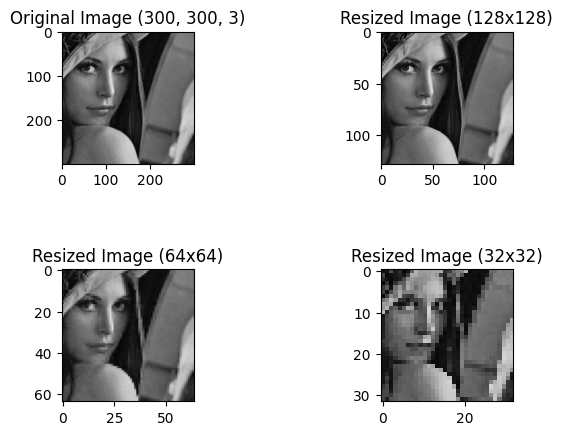

In [205]:
# Perform resizing
low_detail_32 = cv2.resize(low_detail_jpg, dsize=(32, 32))
low_detail_64 = cv2.resize(low_detail_jpg, dsize=(64, 64))
low_detail_128 = cv2.resize(low_detail_jpg, dsize=(128, 128))
current_res = str(low_detail_jpg.shape)

# Show images
rl_titles = [str("Original Image "+current_res), "Resized Image (128x128)", "Resized Image (64x64)", "Resized Image (32x32)"]
rl_images = [low_detail_jpg, low_detail_128, low_detail_64, low_detail_32]
plot_images(rl_images, rl_titles)

# Project 2: Effect of Quantization

In [270]:
# Function to change quantization levels of an image and limit the number of
# possible intensity levels
# Input:
# img - image array as processed by cv2
# n - number of intensity levels desired
def change_quantization(img, n):
    
    # Convert image K values to intensity
    gray = img.astype(np.float32)/255
    
    # Divide by desired bit-shift value
    result = 255*np.floor(gray*n+0.5)/n
    
    # Limit values between 0 and 255
    result = result.clip(0,255).astype(np.uint8)
    
    # Return image
    return result

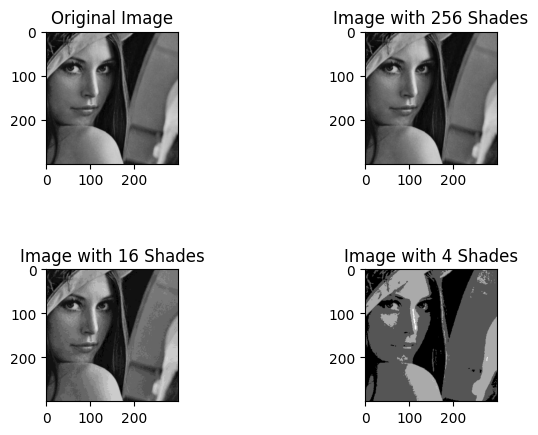

In [271]:
low_8_shades = change_quantization(low_detail_jpg, 3)
low_64_shades = change_quantization(low_detail_jpg, 15)
low_256_shades = change_quantization(low_detail_jpg, 255)

ql_images = list()
ql_images.extend([low_detail_jpg, low_256_shades, low_64_shades, low_8_shades])
ql_titles = ["Original Image", "Image with 256 Shades", "Image with 16 Shades","Image with 4 Shades"]

plot_images(ql_images, ql_titles)

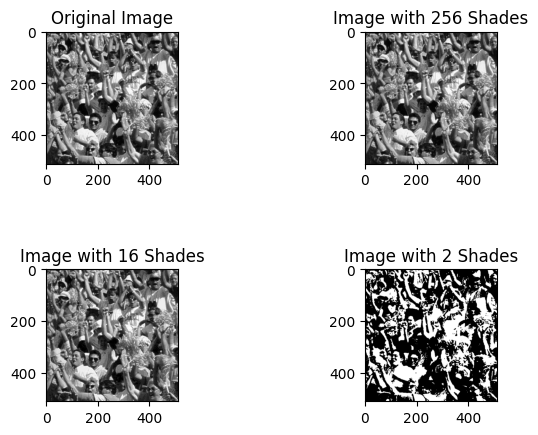

In [198]:
high_8_shades = change_quantization(high_detail_jpg, 1)
high_64_shades = change_quantization(high_detail_jpg, 15)
high_256_shades = change_quantization(high_detail_jpg, 255)

qh_images = list()
qh_images.extend([high_detail_jpg, high_256_shades, high_64_shades, high_8_shades])
qh_titles = ["Original Image", "Image with 256 Shades", "Image with 16 Shades","Image with 2 Shades"]

plot_images(qh_images, qh_titles)

# Project 3: Effect of Sampling and Quantization

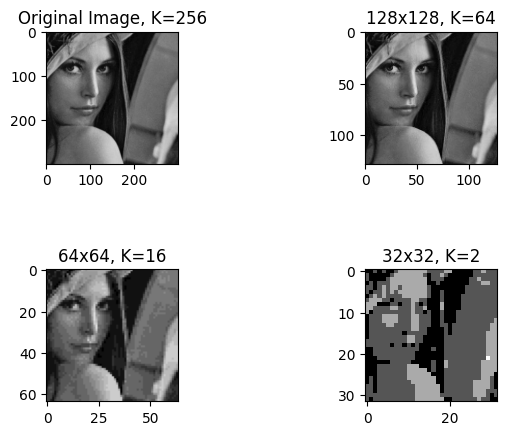

In [207]:
# List of resized images from Project 1
rql_images = list()
levels = [255, 63, 15, 3]
i = 0

# Apply quantization to resized images
for el in rl_images:
    quantized = change_quantization(el, levels[i])
    rql_images.append(quantized)
    i+=1

rql_titles = ["Original Image, K=256", "128x128, K=64", "64x64, K=16", "32x32, K=2"]
plot_images(rql_images, rql_titles)

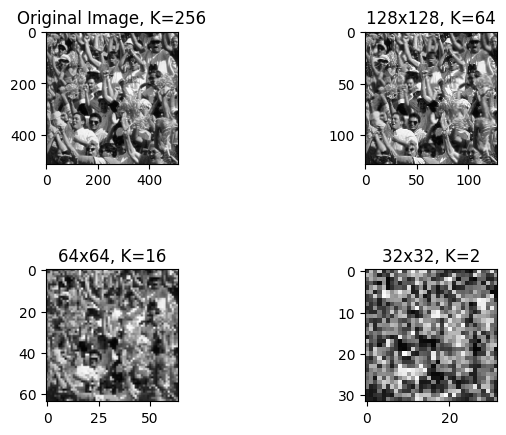

In [209]:
# List of resized images from Project 1
rqh_images = list()
levels = [255, 63, 15, 3]
i = 0

# Apply quantization to resized images
for el in rh_images:
    quantized = change_quantization(el, levels[i])
    rq_images.append(quantized)
    i+=1

rh_titles = ["Original Image, K=256", "128x128, K=64", "64x64, K=16", "32x32, K=2"]
plot_images(rh_images, rh_titles)

# Project 4: Effect of Quantization and Sampling

In [221]:
ldims = [300, 128, 64, 32]

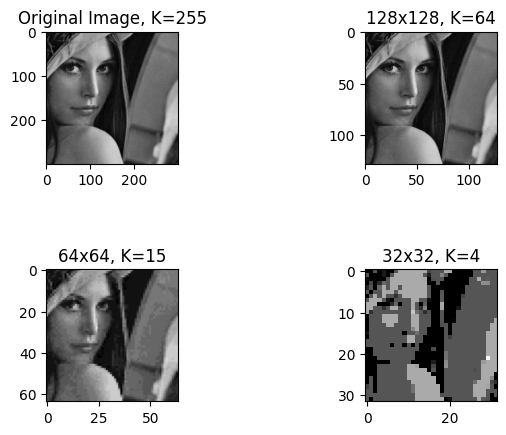

In [222]:
# List of quantized images from Project 2
qlr_images = list()
i = 0

# Apply quantization to resized images
for el in ql_images:
    resized = cv2.resize(el, dsize=(ldims[i], ldims[i]))
    qlr_images.append(resized)
    i+=1

qlr_titles = ["Original Image, K=255", "128x128, K=64", "64x64, K=15", "32x32, K=4"]
plot_images(qlr_images, qlr_titles)

In [223]:
hdims = [300, 128, 64, 32]

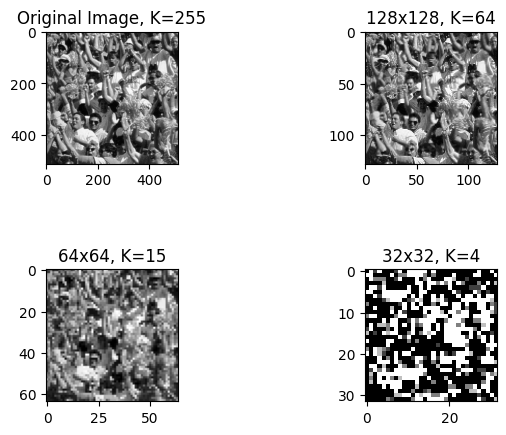

In [224]:
# List of quantized images from Project 2
qrh_images = list()
i = 0

# Apply quantization to resized images
for el in qh_images:
    resized = cv2.resize(el, dsize=(dims[i], dims[i]))
    qrh_images.append(resized)
    i+=1

qrh_titles = ["Original Image, K=255", "128x128, K=64", "64x64, K=15", "32x32, K=4"]
plot_images(qrh_images, qrh_titles)

Optimizing high detail image

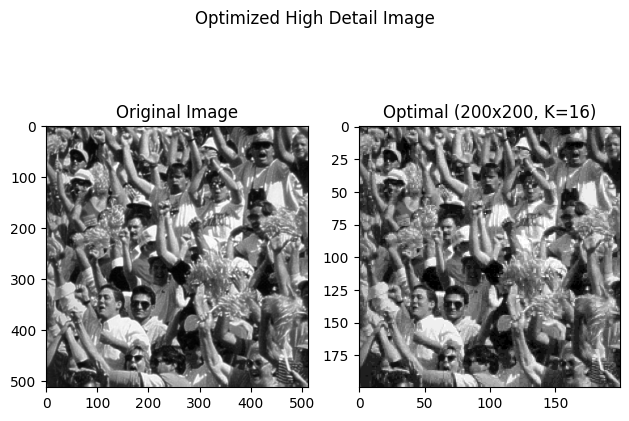

In [258]:
optimal_4 = cv2.resize(high_detail_jpg, dsize=(200,200))
optimal_4 = change_quantization(optimal_4, 16)

fig, ax = plt.subplots(1, 2)
fig.suptitle("Optimized High Detail Image")
ax[0].imshow(high_detail_jpg)
ax[0].set_title("Original Image")
ax[1].imshow(optimal_4)
ax[1].set_title("Optimal (200x200, K=16)")
fig.tight_layout()

Optimizing low detail image

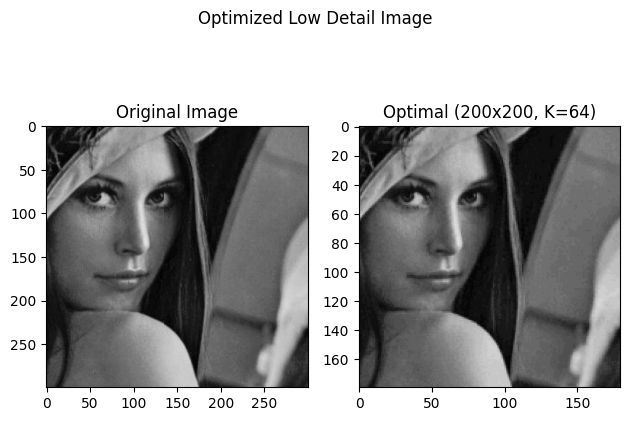

In [267]:
optimal_4 = cv2.resize(low_detail_jpg, dsize=(180,180))
optimal_4 = change_quantization(optimal_4, 32)

fig, ax = plt.subplots(1, 2)
fig.suptitle("Optimized Low Detail Image")
ax[0].imshow(low_detail_jpg)
ax[0].set_title("Original Image")
ax[1].imshow(optimal_4)
ax[1].set_title("Optimal (200x200, K=64)")
fig.tight_layout()